# Support Vector Machines and Kernels

In [1]:
import numpy as np
import sklearn as skl
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time
import mglearn

### Part 1: The Linear Case

Load Iris data:

Number of cases: 150	 Number of features: 4

Class names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


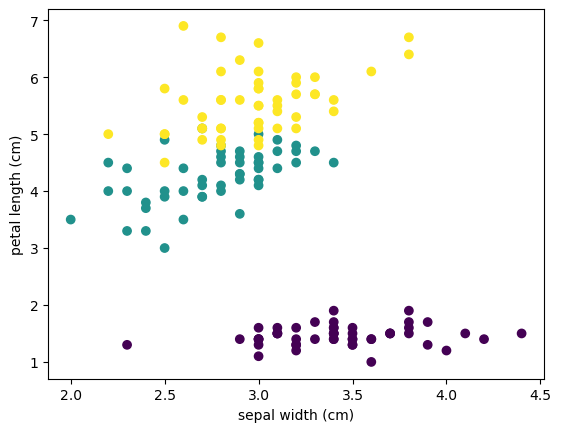

In [2]:
iris_dataset = skl.datasets.load_iris()
print("Number of cases: {}\t Number of features: {}\n".format(iris_dataset['data'].shape[0],iris_dataset['data'].shape[1]))
print("Class names: {}".format(iris_dataset['target_names']))
print("Feature names: {}".format(iris_dataset['feature_names']))
f1 = 1
f2 = 2
plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=iris_dataset['target'])
plt.xlabel(iris_dataset['feature_names'][f1])
plt.ylabel(iris_dataset['feature_names'][f2])
plt.show()

Reducing to two classes:

Original class labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

setosa_class:  
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



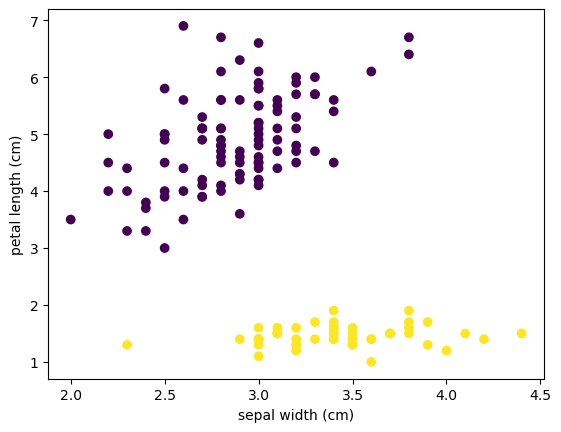

In [3]:
setosa_class = (iris_dataset['target'] == 0).astype(int)
versicolor_class = (iris_dataset['target'] == 1).astype(int)
virginica_class = (iris_dataset['target'] == 2).astype(int)

print("Original class labels: \n{}\n".format(iris_dataset['target']))
print("setosa_class:  \n{}\n".format(setosa_class))


plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=setosa_class)
plt.xlabel(iris_dataset['feature_names'][f1])
plt.ylabel(iris_dataset['feature_names'][f2])
plt.show()

Learning a linear (pure) SVM (using only 2 out of the 4 Iris features):

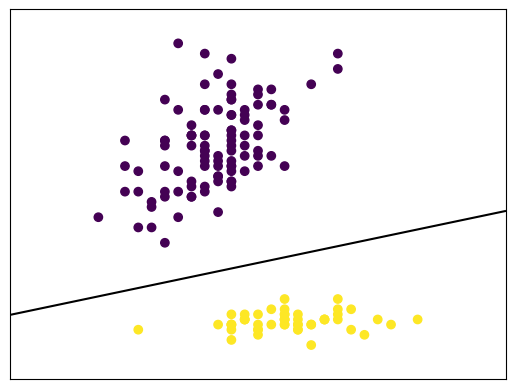

In [4]:
linear_svm = SVC(kernel='linear').fit(iris_dataset['data'][:,[f1,f2]],setosa_class)
plt.scatter(iris_dataset['data'][:,1],iris_dataset['data'][:,f2],c=setosa_class)
mglearn.plots.plot_2d_separator(linear_svm,iris_dataset['data'][:,[f1,f2]])

Identifying and visualizing the support vectors:

Support vectors: 
[[2.5 3. ]
 [3.4 1.9]
 [2.3 1.3]]



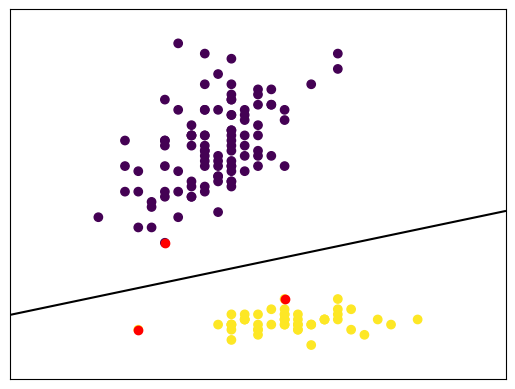

In [5]:
print("Support vectors: \n{}\n".format(linear_svm.support_vectors_))
plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=setosa_class)
plt.scatter(linear_svm.support_vectors_[:,0],linear_svm.support_vectors_[:,1],c='red')
mglearn.plots.plot_2d_separator(linear_svm,iris_dataset['data'][:,[f1,f2]])

Testing the scalability of SVC on linearly separable data. We are using 'blobs' data that looks as follows:

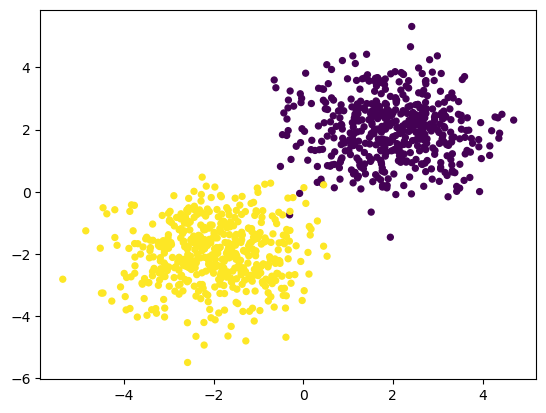

In [14]:
X, y = make_blobs(centers=np.array([[2,2],[-2,-2]]), n_samples=1000, random_state=11)
plt.scatter(X[:, 0], X[:, 1], c=y, s=18.0)
plt.show()

When n_samples gets large, the two generated blobs will almost surely overlap, i.e., the data is
then not linarly separable. A linear decision boundary will still be appropriate for the data, and
SVC can handle this non linearly separable data.

Now we create blobs data of varying size, and measure the time it takes to learn a linear SVM:

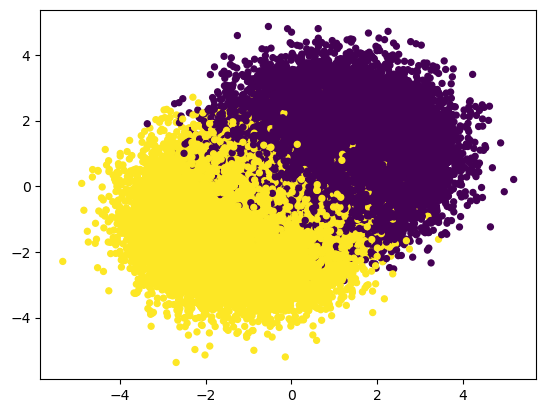

In [33]:
sizes=np.array([100,1000, 10000,100000])
#sizes=np.array([100,500,1000,50000,100000,500000])
times=np.zeros(sizes.size)
center = 1
for i,s in enumerate(sizes):
    X, y = make_blobs(centers=np.array([[center,center],[-center,-center]]), n_samples=s)
    start=time.time()
    linear_svm = SVC(kernel='linear').fit(X,y)
    end=time.time()
    times[i]=end-start 

plt.scatter(X[:, 0], X[:, 1], c=y, s=18.0)
plt.show()

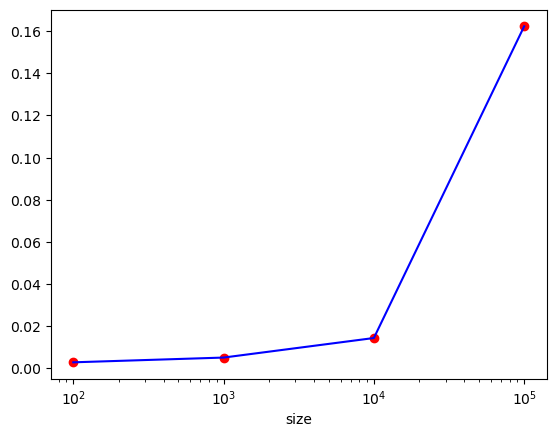

In [30]:
plt.xscale('log')
plt.xlabel('size')

plt.plot(sizes,times,'ro')
plt.plot(sizes,times,'b-')

plt.show()

**Exercise:** Try a larger range of datasizes (e.g. start with the commented 'sizes' array above). You may need to plot using log-scale on the x-axis. What do you observe? What happens when you change the coordinates of the blob centers (initially set to [2,2] and[-2,-2])? Why?

### Part 2: The nonlinear case:  kernels

Trying to classify Iris Versicolor with a linear SVM as before:

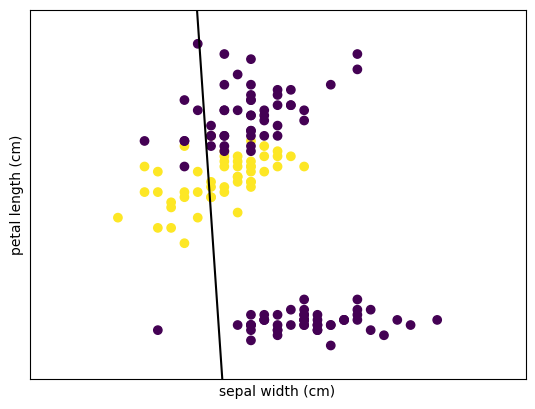

Accuracy (on train): 0.72


In [22]:
f1 = 1
f2 = 2
linear_svm = SVC(kernel='linear').fit(iris_dataset['data'][:,[f1,f2]],versicolor_class)
plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=versicolor_class)
plt.xlabel(iris_dataset['feature_names'][f1])
plt.ylabel(iris_dataset['feature_names'][f2])

mglearn.plots.plot_2d_separator(linear_svm,iris_dataset['data'][:,[f1,f2]])

plt.show()
print("Accuracy (on train): {}".format(linear_svm.score(iris_dataset['data'][:,[f1,f2]],versicolor_class)))

Maybe we can do better when we include all 4 features of Iris:

In [ ]:
linear_svm = SVC(kernel='linear').fit(iris_dataset['data'],versicolor_class)
print("Accuracy (on train): {}".format(linear_svm.score(iris_dataset['data'],versicolor_class)))

Does not help much! Let's go back to only 2 features, and try some standard nonlinear kernels:

In [ ]:
kernel_svm = SVC(kernel='rbf', gamma=1.0).fit(iris_dataset['data'][:,[f1,f2]],versicolor_class)
plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=versicolor_class)
plt.scatter(kernel_svm.support_vectors_[:,0],kernel_svm.support_vectors_[:,1],c='red')
mglearn.plots.plot_2d_separator(kernel_svm,iris_dataset['data'][:,[f1,f2]])
print("Accuracy (on train): {}".format(kernel_svm.score(iris_dataset['data'][:,[f1,f2]],versicolor_class)))
plt.show()

Investigating the gamma parameter of the rbf kernel:

In [ ]:
gammavals = np.array([0.1,1.0,10.0,50.0])
accuracies = np.zeros(gammavals.size)
fig,axes = plt.subplots(gammavals.size,figsize=(10,20))
for i,g in enumerate(gammavals):
    currentax = axes.ravel()[i]
    kernel_svm = SVC(kernel='rbf', gamma=g).fit(iris_dataset['data'][:,[f1,f2]],versicolor_class)
    accuracies[i]=kernel_svm.score(iris_dataset['data'][:,[f1,f2]],versicolor_class)
    currentax.set_title("Gamma: {}  Train accuracy: {}".format(g,accuracies[i]))
    mglearn.plots.plot_2d_separator(kernel_svm, iris_dataset['data'][:,[f1,f2]], ax=currentax)
    mglearn.discrete_scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],versicolor_class,ax=currentax)
    mglearn.discrete_scatter(kernel_svm.support_vectors_[:,0],kernel_svm.support_vectors_[:,1],c='red', ax=currentax)

**Exercise** Now do a train/test split of the Iris data, and check for different Gamma values the train and the test 
accuracy. At which Gamma do you observe overfitting? The following cell already contains the code for getting train and test data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'][:,[f1,f2]],versicolor_class, stratify=versicolor_class)

### Part 3: Using Custom Kernels

Creating a positive-semi definite Kernel matrix (we compute and print the eigenvalues to verify whether our matrix is positive definite, i.e., only has positive eigenvalues):

In [ ]:
from numpy.linalg import eig
kmatrix = np.array([[0.5,0.4,0.1,0.6,0.5],[0,.5,0.6,0.4,0.4],[0,0,0.5,0.3,0.1],[0,0,0,0.5,0.2],[0,0,0,0,0.5]])
kmatrix = kmatrix + kmatrix.transpose()
print("Matrix:\n{}".format(kmatrix))
print("Eigenvalues:\n{}".format(eig(kmatrix)[0]))

Define class labels:

In [ ]:
labels = np.array([1,-1,-1,-1,1])

Learn an SVM classifier:

In [ ]:
my_kernel_svm = SVC(kernel='precomputed').fit(kmatrix,labels)
my_kernel_svm.predict(kmatrix)

Apply the trained SVM to a new test instance, given by its kernel values with respect to the training instances:

In [ ]:
test_kernel_vals=np.array([[0.5,0.5,0.1,0.4,0.5]])
my_kernel_svm.predict(test_kernel_vals)